HW1

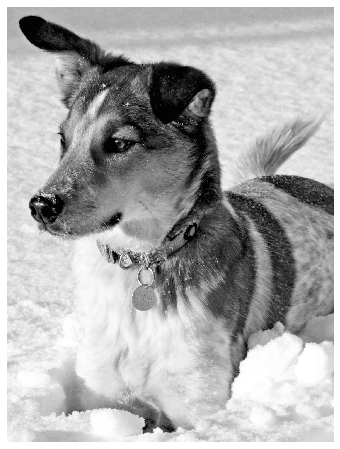

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('..','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [33]:
U, S, VT = np.linalg.svd(X,full_matrices=True)

In [25]:
r = 40    # first 40 column
lowerU = U[:,:r]
lowerU.transpose()@lowerU   #U^T*U, can be rounded to identity matrix

array([[ 1.00000000e+00,  2.08166817e-17,  3.33066907e-16, ...,
         3.27429056e-17,  3.46944695e-18,  2.42861287e-17],
       [ 2.08166817e-17,  1.00000000e+00, -2.96637714e-16, ...,
        -1.38777878e-17,  2.51534904e-17,  4.16333634e-17],
       [ 3.33066907e-16, -2.96637714e-16,  1.00000000e+00, ...,
         2.08166817e-17, -1.73472348e-17, -3.12250226e-17],
       ...,
       [ 3.27429056e-17, -1.38777878e-17,  2.08166817e-17, ...,
         1.00000000e+00,  1.11022302e-16, -8.32667268e-17],
       [ 3.46944695e-18,  2.51534904e-17, -1.73472348e-17, ...,
         1.11022302e-16,  1.00000000e+00, -4.02455846e-16],
       [ 2.42861287e-17,  4.16333634e-17, -3.12250226e-17, ...,
        -8.32667268e-17, -4.02455846e-16,  1.00000000e+00]])

In [26]:
lowerU@lowerU.transpose()   #U*U^T 

array([[0.00333849, 0.00330578, 0.00327879, ..., 0.00306681, 0.00324286,
        0.00337852],
       [0.00330578, 0.00329404, 0.00327327, ..., 0.00308838, 0.00326191,
        0.0033966 ],
       [0.00327879, 0.00327327, 0.00328023, ..., 0.00311332, 0.00328159,
        0.00341748],
       ...,
       [0.00306681, 0.00308838, 0.00311332, ..., 0.00553755, 0.00567471,
        0.00577501],
       [0.00324286, 0.00326191, 0.00328159, ..., 0.00567471, 0.00587605,
        0.00600432],
       [0.00337852, 0.0033966 , 0.00341748, ..., 0.00577501, 0.00600432,
        0.0061753 ]])

In [28]:
error = []
for r in range(2000):
    lowerU = U[:,:r]
    error.append(np.linalg.norm(lowerU@lowerU.transpose()-np.identity(2000)))

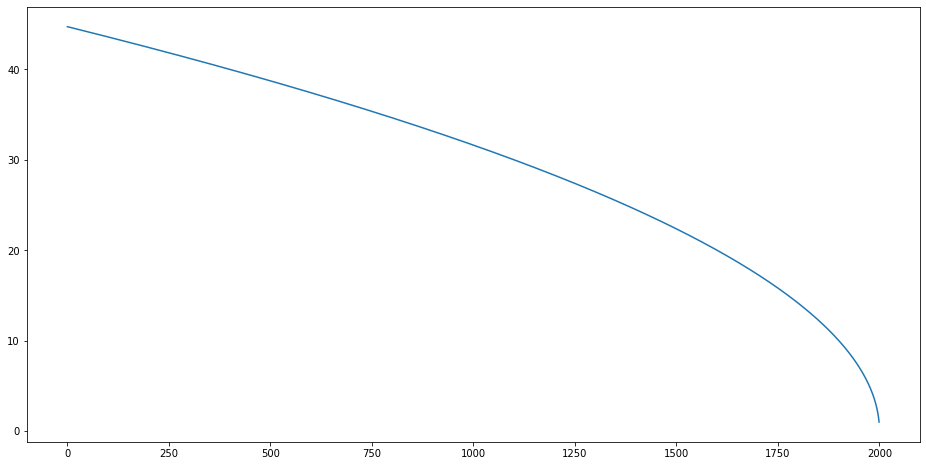

In [30]:
plt.plot(error)

HW2

In [68]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

In [76]:
reconst_error = [] #frobenius norm of reconstruction error
for r in range(U.shape[1]):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    reconst_error.append(np.linalg.norm(Xapprox-X,'fro'))

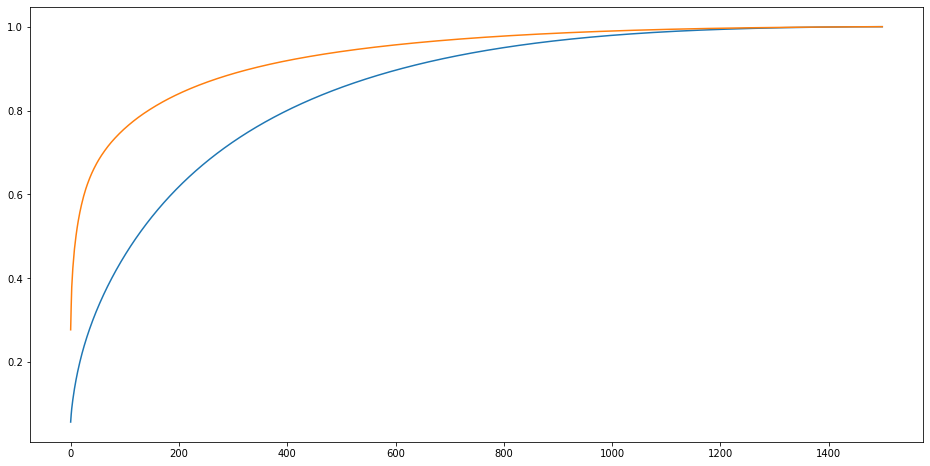

In [104]:
reconst_error = np.array(reconst_error)
missing_var = reconst_error/np.sum(reconst_error)
plt.plot(np.cumsum(missing_var))
plt.plot(np.cumsum(np.diag(S)/np.sum(np.diag(S))))

HW3

In [113]:
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('..','DATA','allFaces.mat'))
faces = np.float64(mat_contents['faces'])
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

In [114]:
avgFace = np.mean(faces,axis=1)

In [116]:
## standard SVD
X = faces - np.tile(avgFace,(faces.shape[1],1)).T
Uf, Sf, VTf = np.linalg.svd(X,full_matrices=0)

In [126]:
## methods of snapshot
correlation = X.T@X
Vs,Ss,VTs = np.linalg.svd(correlation,full_matrices=0)
Us = X@Vs@np.diag(1/Ss)

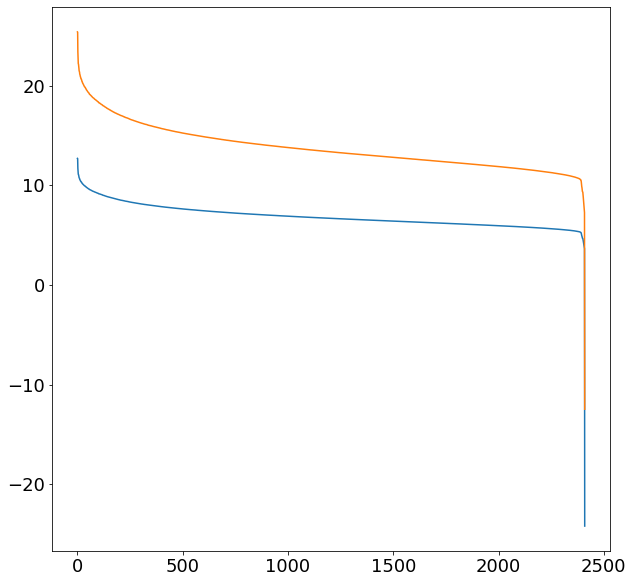

In [127]:
plt.plot(np.log(Sf))
plt.plot(np.log(Ss))

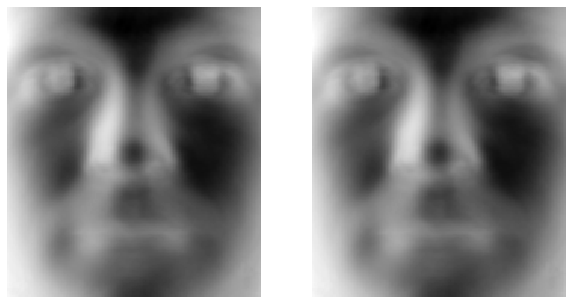

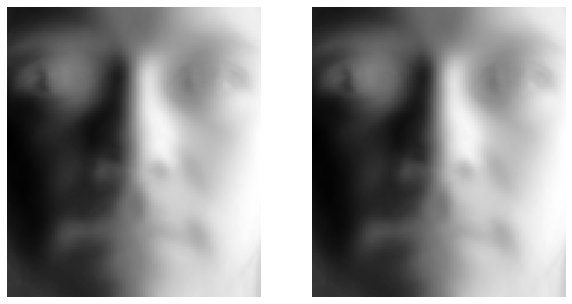

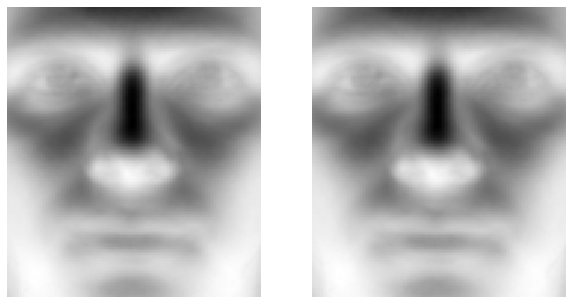

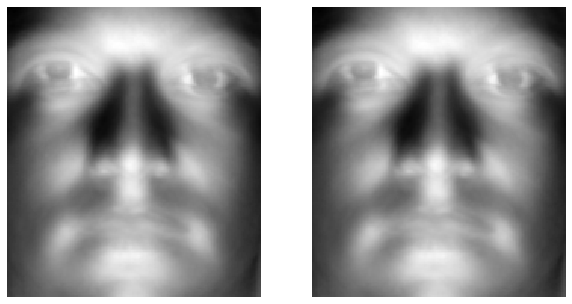

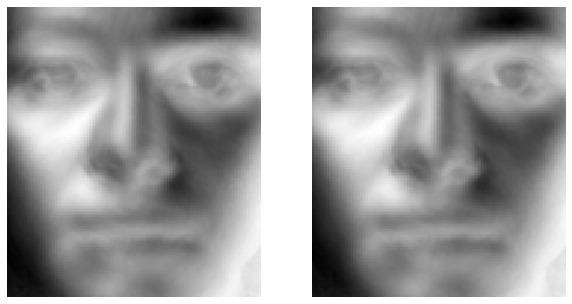

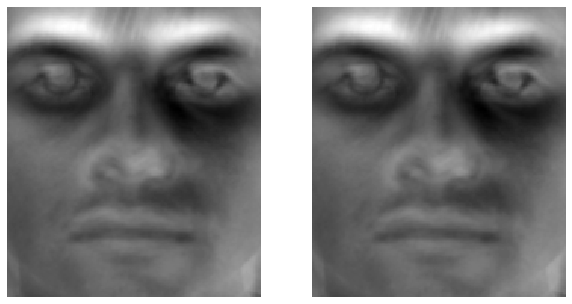

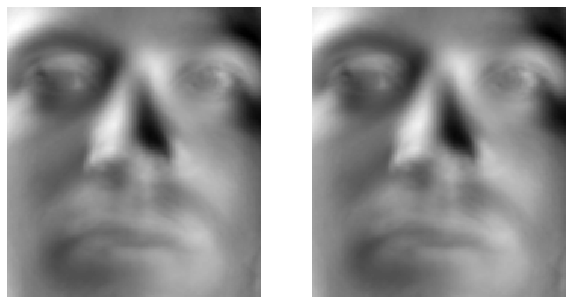

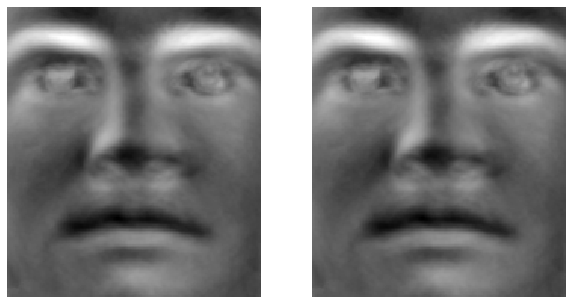

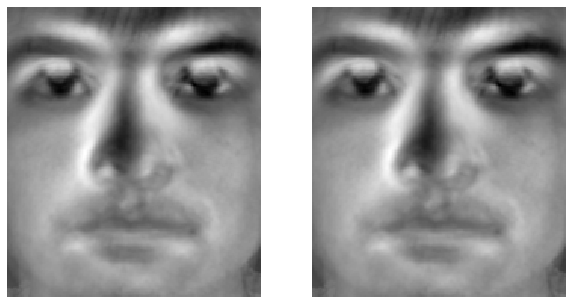

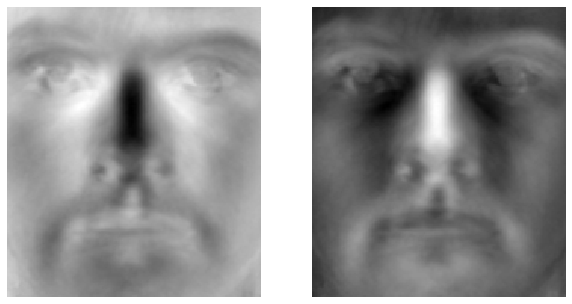

In [136]:
###left is made by method of snapshots, the right is made by standard svd
for i in range(10):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(121)
    img_avg = ax1.imshow(np.reshape(Us[:,i],(m,n)).T)
    img_avg.set_cmap('gray')
    plt.axis('off')

    ax2 = fig1.add_subplot(122)
    img_u1 = ax2.imshow(np.reshape(Uf[:,i],(m,n)).T)
    img_u1.set_cmap('gray')
    plt.axis('off')

    plt.show()

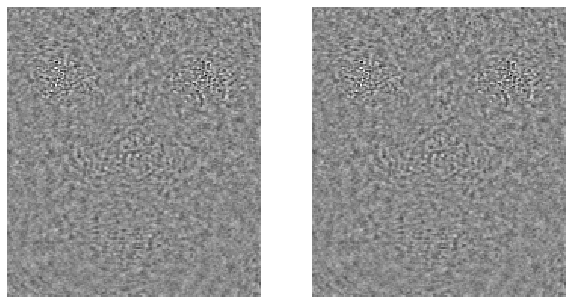

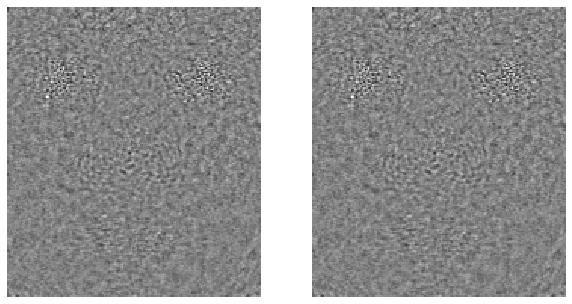

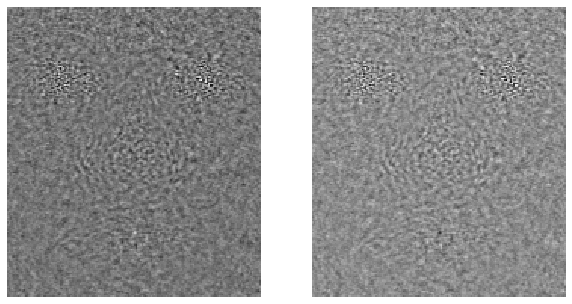

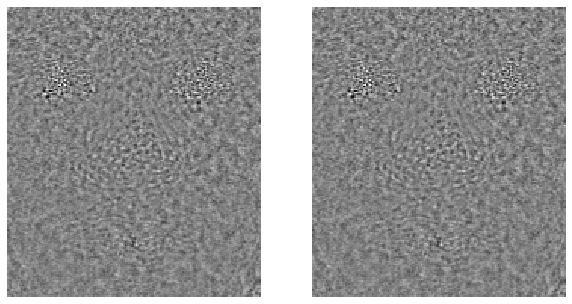

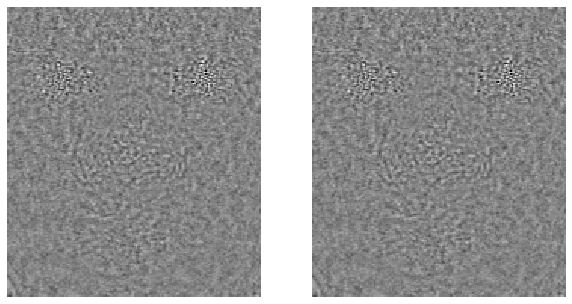

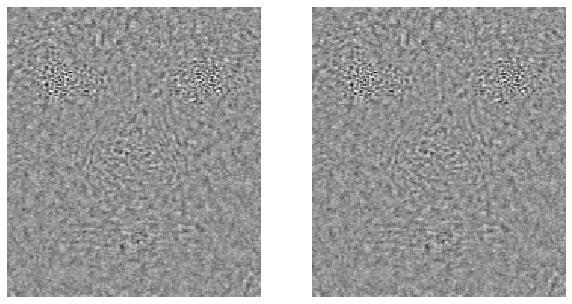

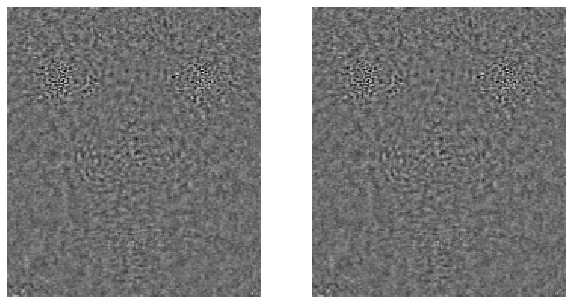

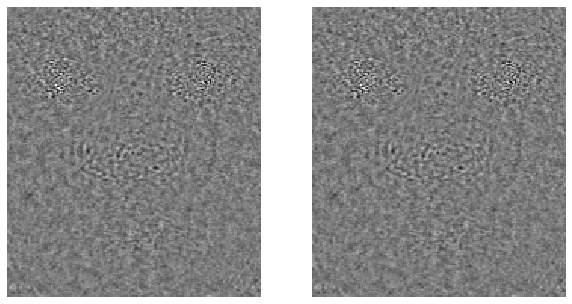

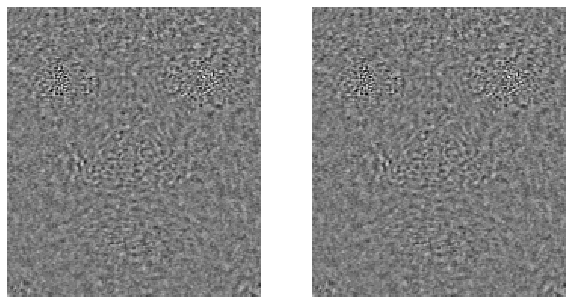

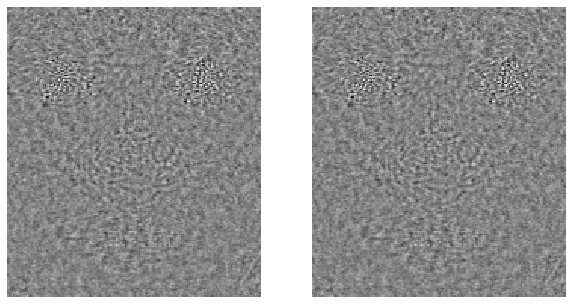

In [137]:
###left is made by method of snapshots, the right is made by standard svd
for i in range(2000,2010):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(121)
    img_avg = ax1.imshow(np.reshape(Us[:,i],(m,n)).T)
    img_avg.set_cmap('gray')
    plt.axis('off')

    ax2 = fig1.add_subplot(122)
    img_u1 = ax2.imshow(np.reshape(Uf[:,i],(m,n)).T)
    img_u1.set_cmap('gray')
    plt.axis('off')

    plt.show()

Not able to provide eigenface

HW4

In [142]:
X = np.random.randn(100,100)

In [143]:
U4, S4, VT4 = np.linalg.svd(X,full_matrices=0)

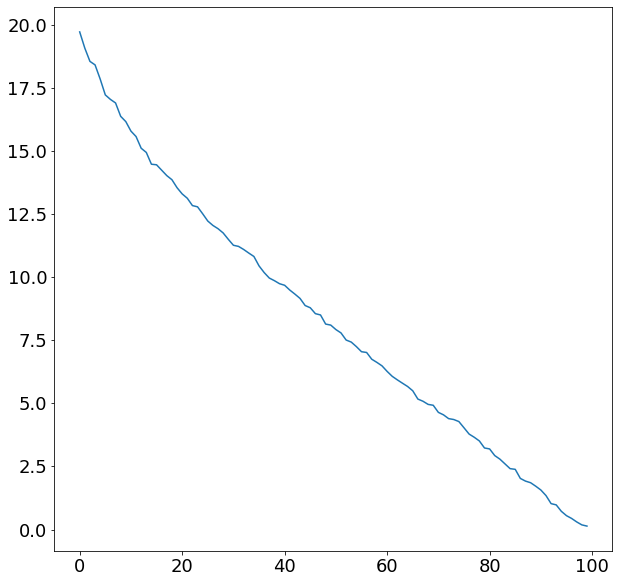

In [144]:
plt.plot(S4)

In [159]:
Sset = []
for i in range(100):
    X = np.random.randn(100,100)
    U4, S4, VT4 = np.linalg.svd(X,full_matrices=0)
    Sset.append(S4)

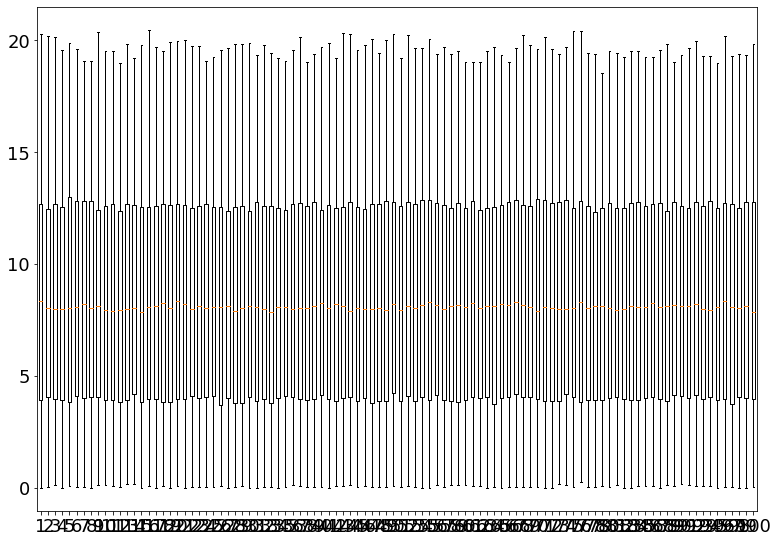

In [161]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(Sset)
plt.show()

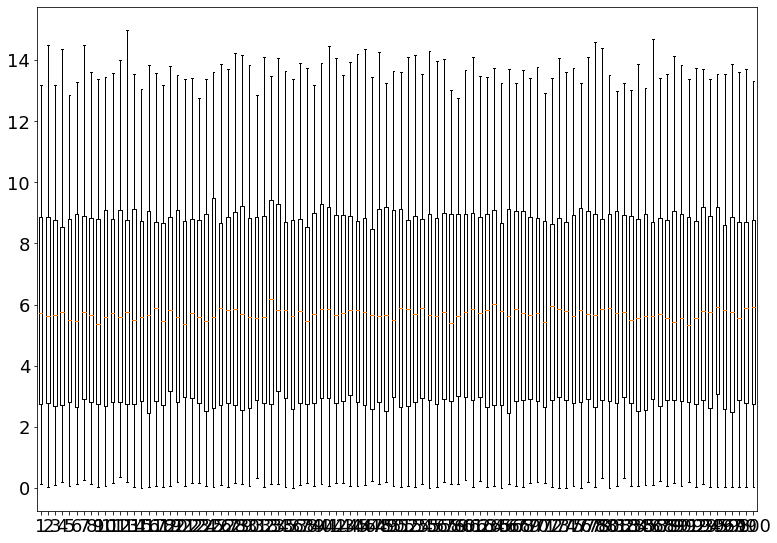

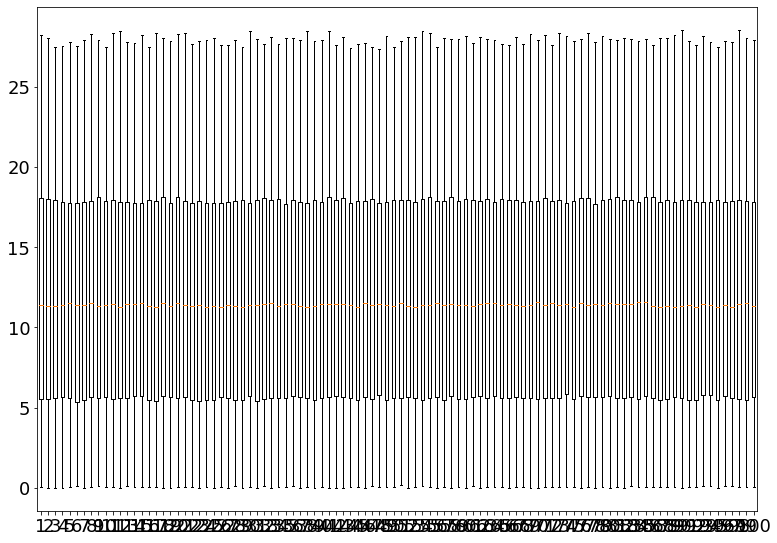

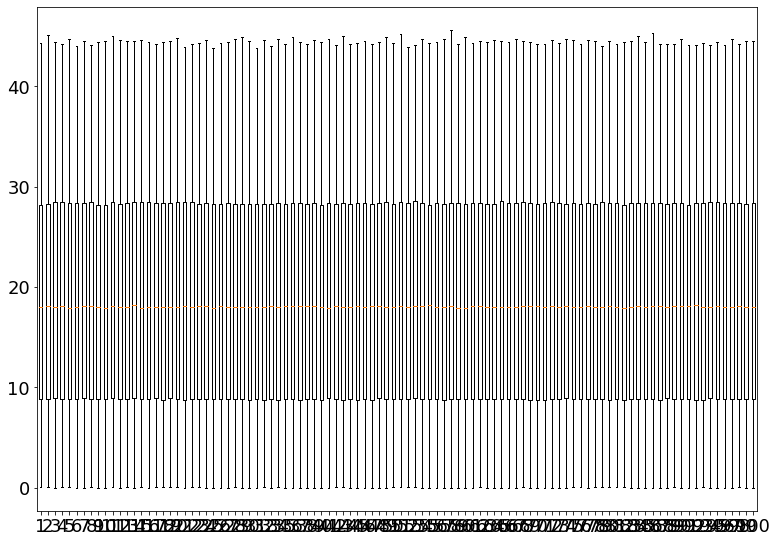

In [163]:
size = [50,200,500]
for j in size:
    Sset = []
    for i in range(100):
        X = np.random.randn(j,j)
        U4, S4, VT4 = np.linalg.svd(X,full_matrices=0)
        Sset.append(S4)
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(Sset)
    plt.show()

larger mean, and larger median. since 100 simulation made, we can focus on median